In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "C:/Users/s0chak17/Downloads/archive/Hitters.csv"

In [3]:
Hitters_data = pd.read_csv(path)

In [5]:
Hitters_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [6]:
Hitters_data.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [7]:
Hitters_data.shape

(322, 20)

In [8]:
dummy_data = LabelEncoder()

Hitters_data["League"] = dummy_data.fit_transform(Hitters_data["League"])
Hitters_data["Division"] = dummy_data.fit_transform(Hitters_data["Division"])
Hitters_data["NewLeague"] = dummy_data.fit_transform(Hitters_data["NewLeague"])

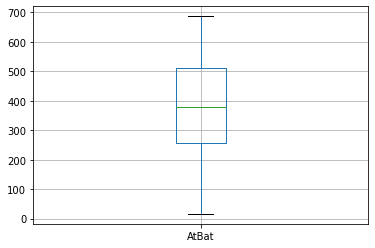

In [9]:
Hitters_data.boxplot("AtBat")

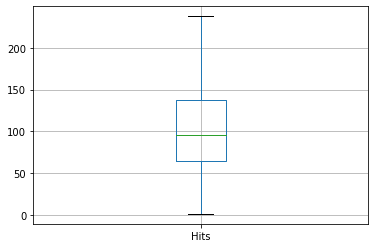

In [10]:
Hitters_data.boxplot("Hits")

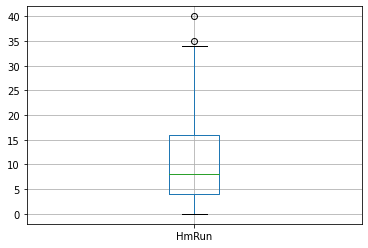

In [11]:
Hitters_data.boxplot("HmRun")

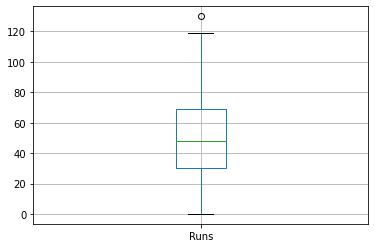

In [12]:
Hitters_data.boxplot("Runs")
#nk

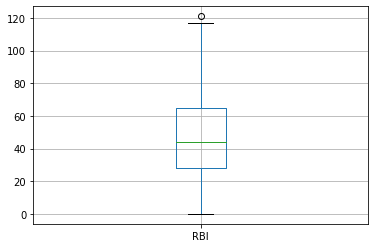

In [13]:
Hitters_data.boxplot("RBI")

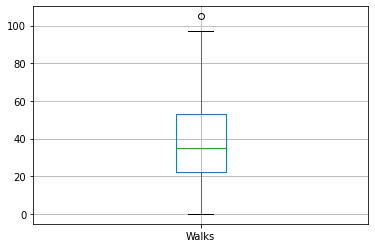

In [14]:
Hitters_data.boxplot("Walks")

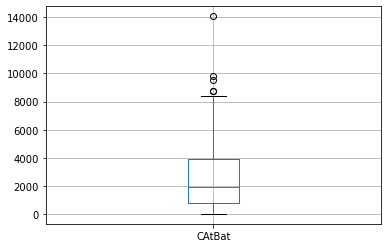

In [15]:
Hitters_data.boxplot("CAtBat")

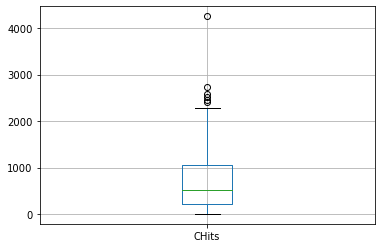

In [16]:
Hitters_data.boxplot("CHits")

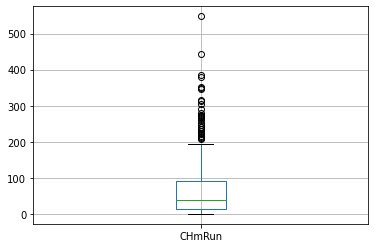

In [17]:
Hitters_data.boxplot("CHmRun")

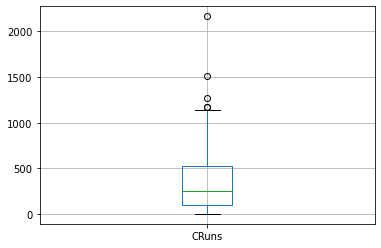

In [18]:
Hitters_data.boxplot("CRuns")

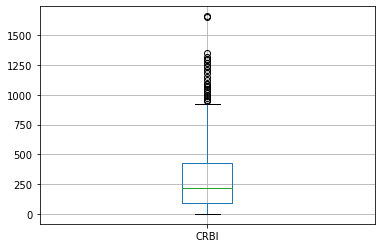

In [19]:
Hitters_data.boxplot("CRBI")

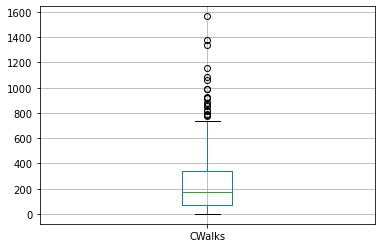

In [20]:
Hitters_data.boxplot("CWalks")

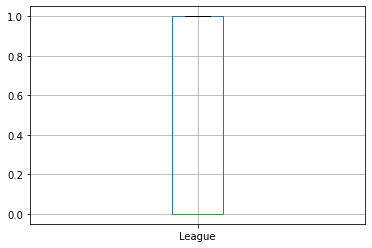

In [21]:
Hitters_data.boxplot("League")

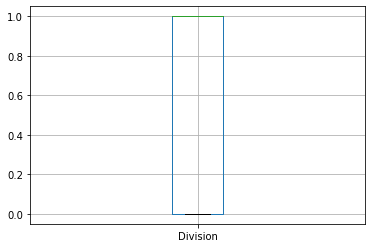

In [22]:
Hitters_data.boxplot("Division")

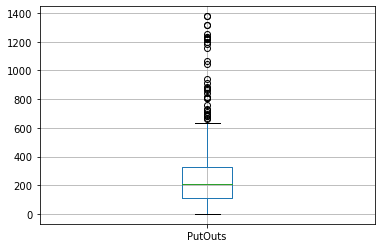

In [23]:
Hitters_data.boxplot("PutOuts")

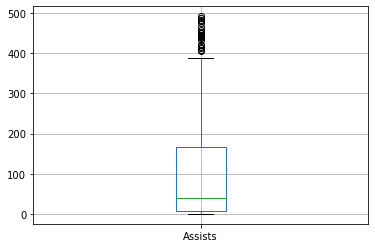

In [24]:
Hitters_data.boxplot("Assists")

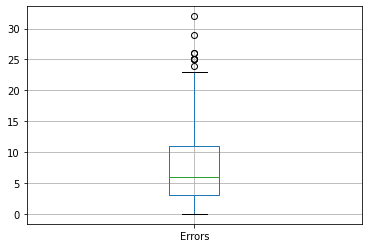

In [25]:
Hitters_data.boxplot("Errors")

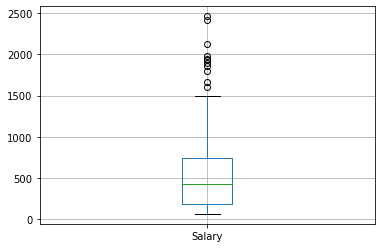

In [26]:
Hitters_data.boxplot("Salary")

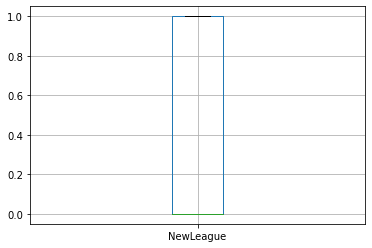

In [27]:
Hitters_data.boxplot("NewLeague")

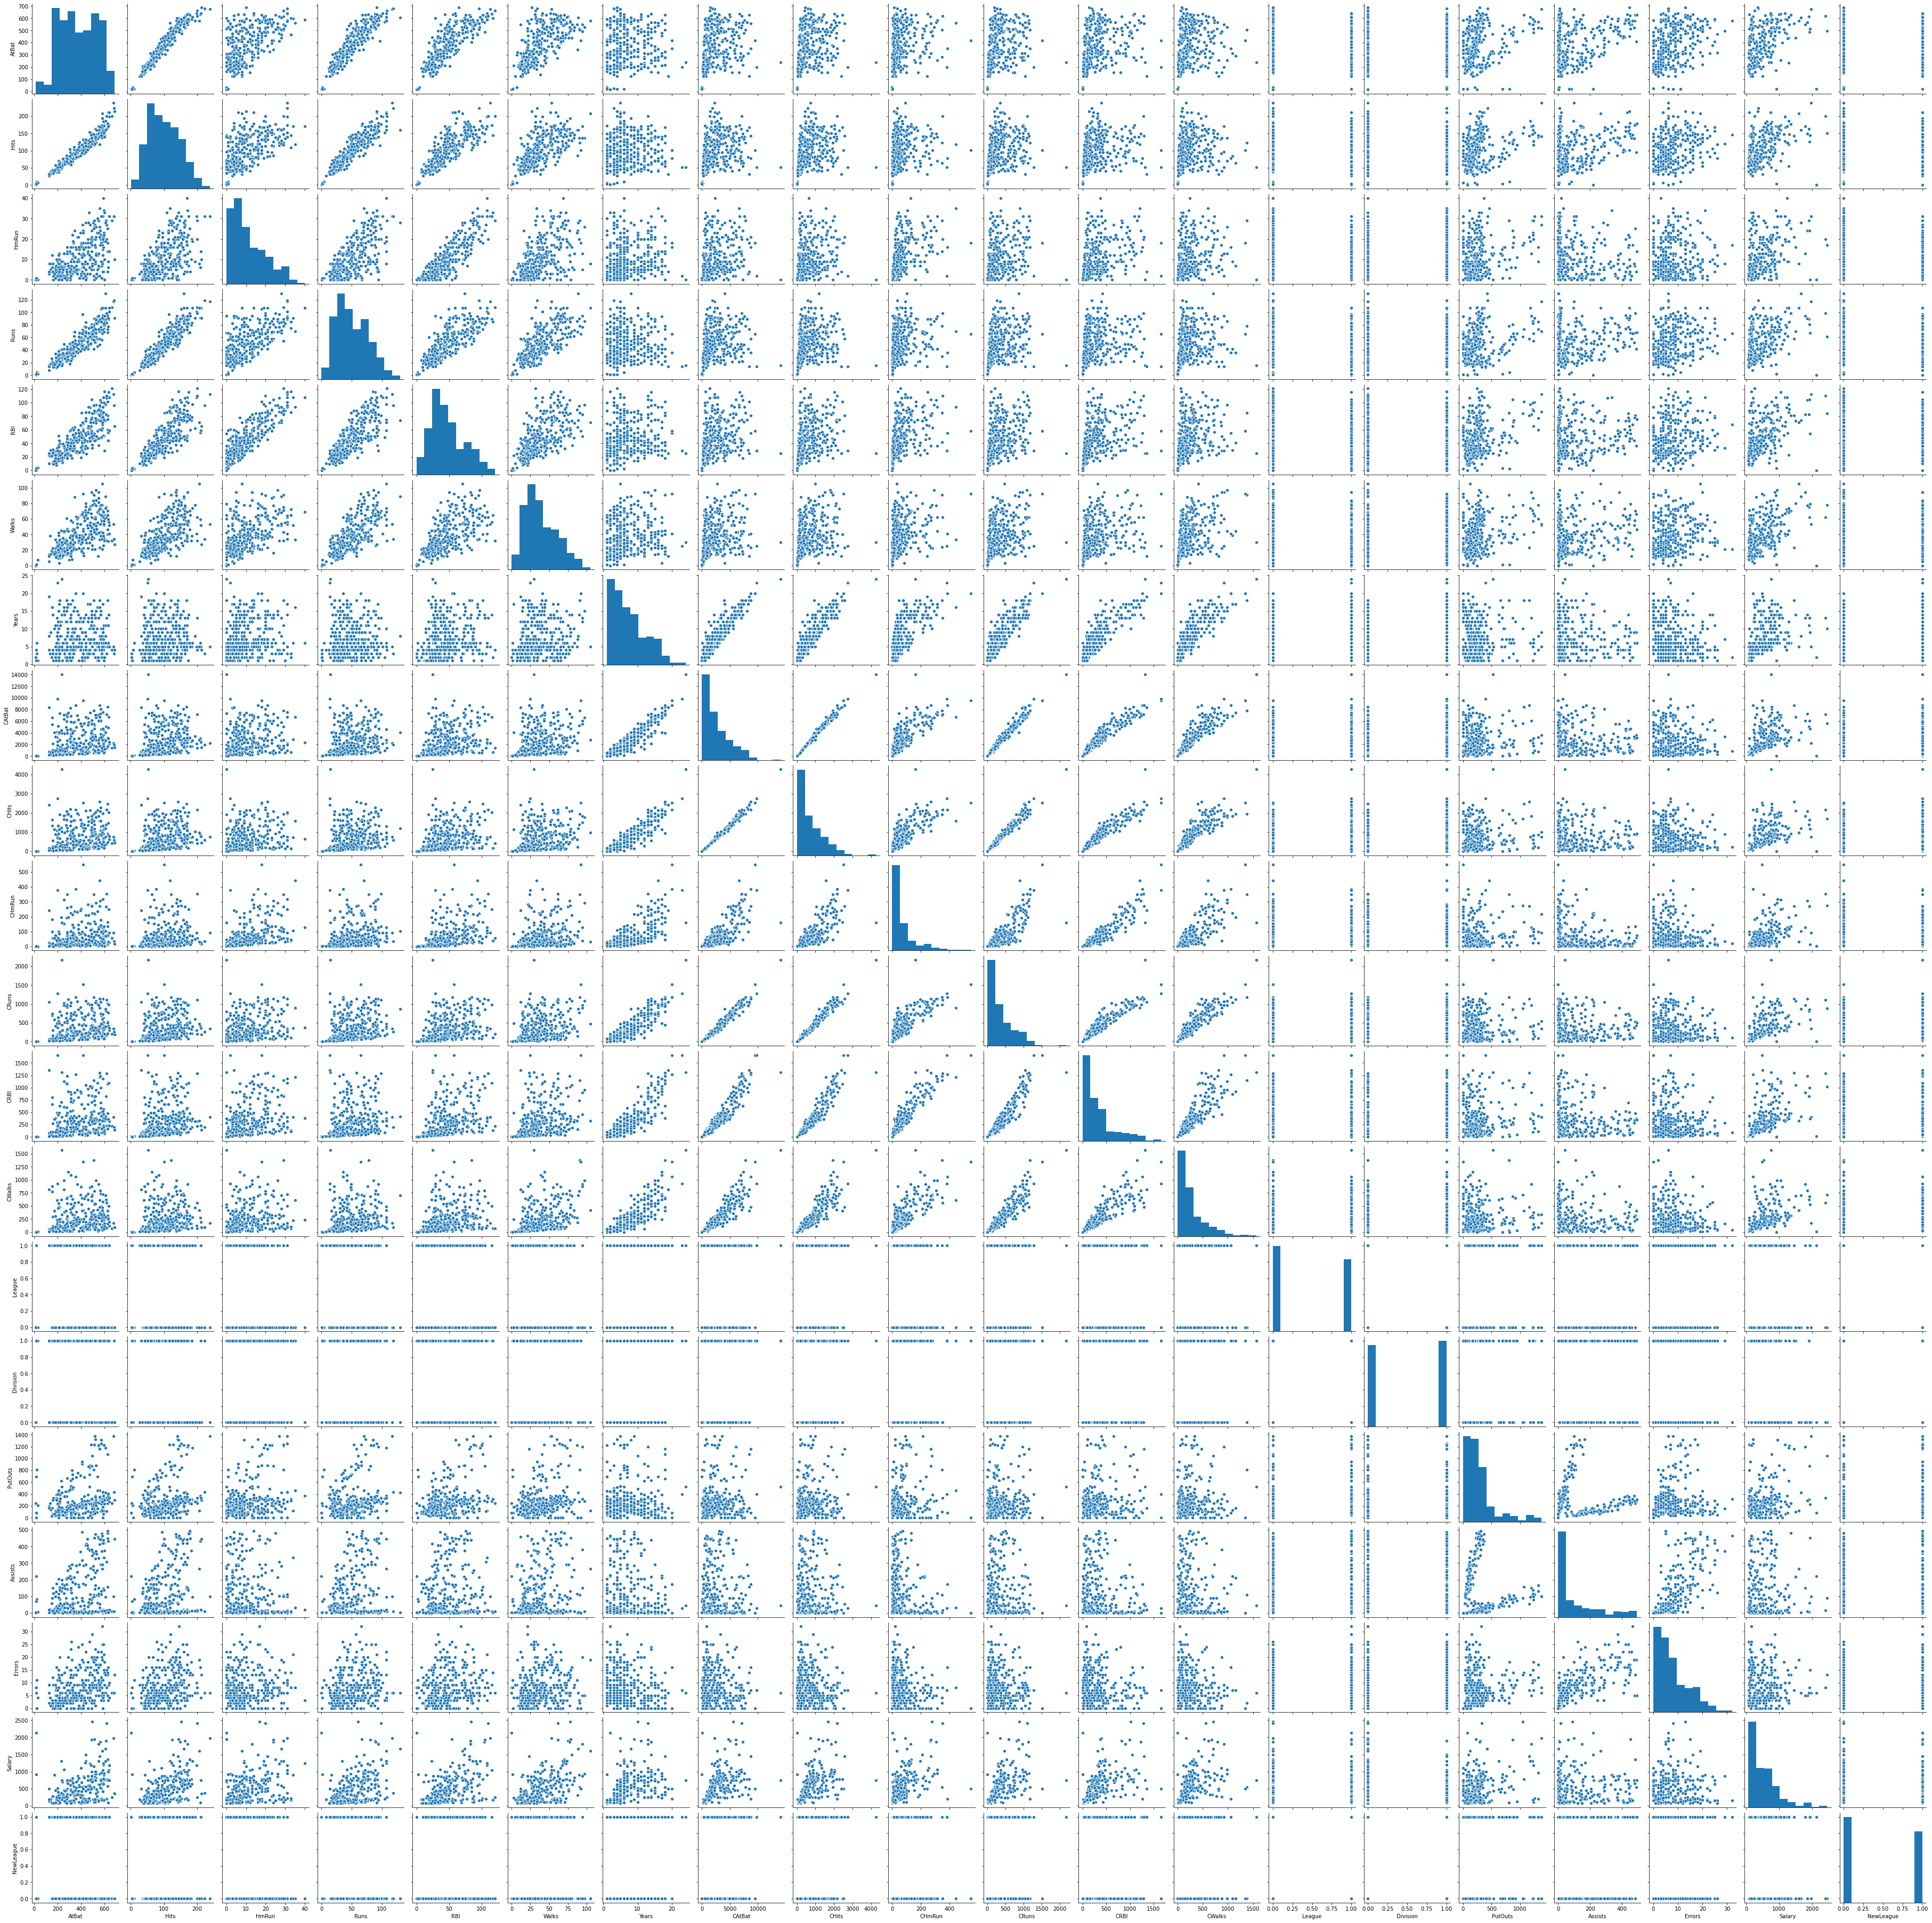

In [28]:
sns.pairplot(Hitters_data)

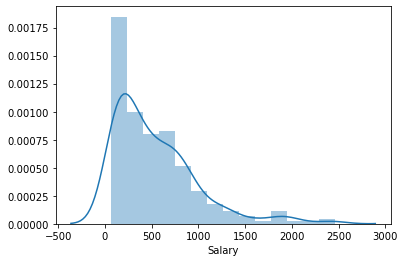

In [29]:
sns.distplot(Hitters_data["Salary"])

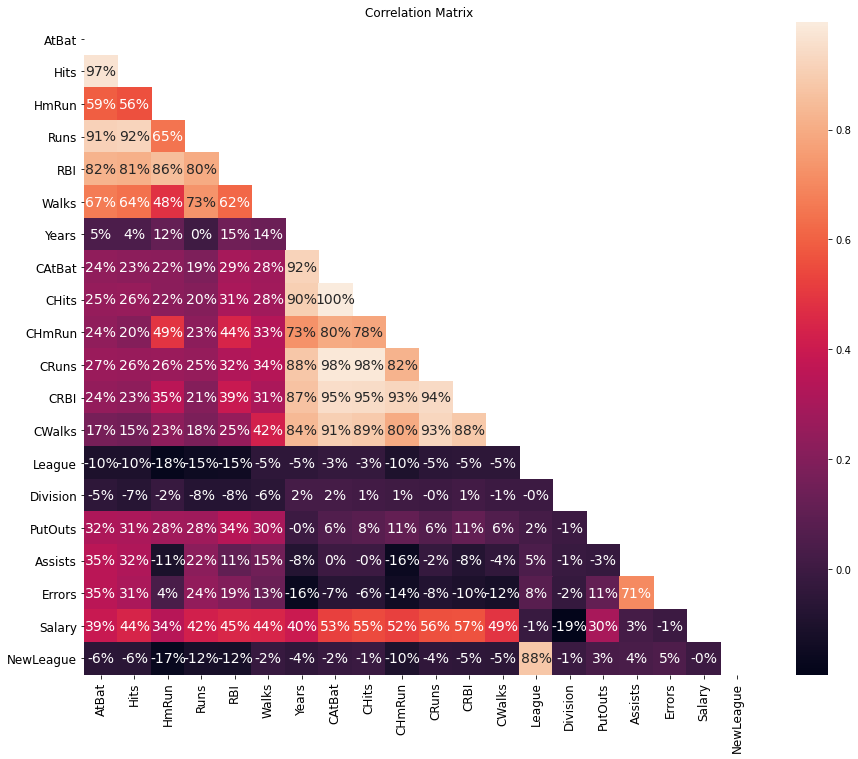

In [30]:
Correlation  = Hitters_data.corr()

mask = np.zeros_like(Correlation)
mask_check = np.triu_indices_from(mask)
mask[mask_check] = True

plt.figure(figsize = (15,12))
sns.heatmap(Correlation, mask = mask, annot = True, fmt = "0.0%", annot_kws = {"size" : "14"})
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.title("Correlation Matrix")
plt.show()

In [31]:
X = Hitters_data.drop(Hitters_data[["Salary"]], axis = 1)
Y = Hitters_data["Salary"]

In [32]:
Standardized = StandardScaler()
X_standard = Standardized.fit_transform(X)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X_standard, Y, test_size = 0.3, random_state = 6)

## We want explained variance to be 95% (ideally 95-99%), hence n_components = 0.95

In [34]:
model = PCA(n_components = 0.95)
model.fit(X_standard)

PCA(n_components=0.95)

In [35]:
explained_variance = model.explained_variance_ratio_
explained_variance

array([0.38880859, 0.2201228 , 0.1048596 , 0.08127773, 0.05271017,
       0.04399237, 0.03500536, 0.02499924])

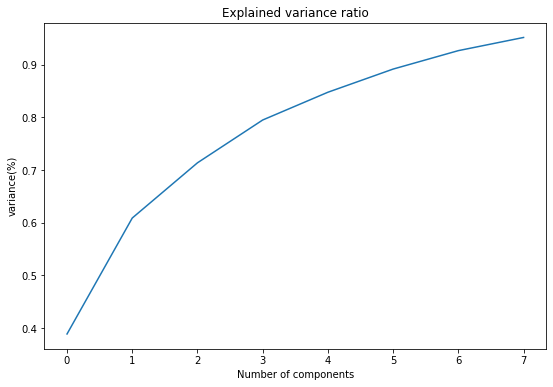

In [36]:
plt.figure(figsize = (9,6))
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("variance(%)")
plt.title("Explained variance ratio")
plt.show()

## From the above plot, it is clear that to get 95% variance, we need no:of components = 10

In [37]:
from sklearn.decomposition import PCA

PCA = PCA(n_components = 10)
X_train = PCA.fit_transform(X_train)
X_test = PCA.fit_transform(X_test)

In [ ]:
model_LR = LinearRegression()
model_LR.fit(X_train,Y_train)

In [41]:
print("Model score on training set: ", model_LR.score(X_train,Y_train))

Model score on training set:  0.5290385199617696


In [42]:
prediction_Y = model_LR.predict(X_test)

In [43]:
CV_Score = cross_val_score(model_LR,X_train,Y_train,cv = 5)

print("cross-validation score: ", CV_Score.mean())

cross-validation score:  0.4763578706768593


In [44]:
print("MSE: ", mean_squared_error(Y_test, prediction_Y))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, prediction_Y)))

MSE:  141741.56142644052
RMSE:  376.4858050796079
